# Support Vector Machines
## SVM - Regression
Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Data\dataset\DATA\cement_slump.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


## EDA - explonatory data analys

In [4]:
df.shape

(103, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.0,229.894175,78.877230,137.00,152.00,248.00,303.900,374.00
Slag,103.0,77.973786,60.461363,0.00,0.05,100.00,125.000,193.00
Fly ash,103.0,149.014563,85.418080,0.00,115.50,164.00,235.950,260.00
Water,103.0,197.167961,20.208158,160.00,180.00,196.00,209.500,240.00
SP,103.0,8.539806,2.807530,4.40,6.00,8.00,10.000,19.00
Coarse Aggr.,103.0,883.978641,88.391393,708.00,819.50,879.00,952.800,1049.90
Fine Aggr.,103.0,739.604854,63.342117,640.60,684.50,742.70,788.000,902.00
SLUMP(cm),103.0,18.048544,8.750844,0.00,14.50,21.50,24.000,29.00
FLOW(cm),103.0,49.610680,17.568610,20.00,38.50,54.00,63.750,78.00
Compressive Strength (28-day)(Mpa),103.0,36.038738,7.837120,17.19,30.90,35.52,41.205,58.53


In [7]:
df.isna().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

In [8]:
df.duplicated(subset=None).sum()

0

In [9]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [10]:
plt.style.use('default')

In [11]:
matrix = df.corr()

mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)]=True

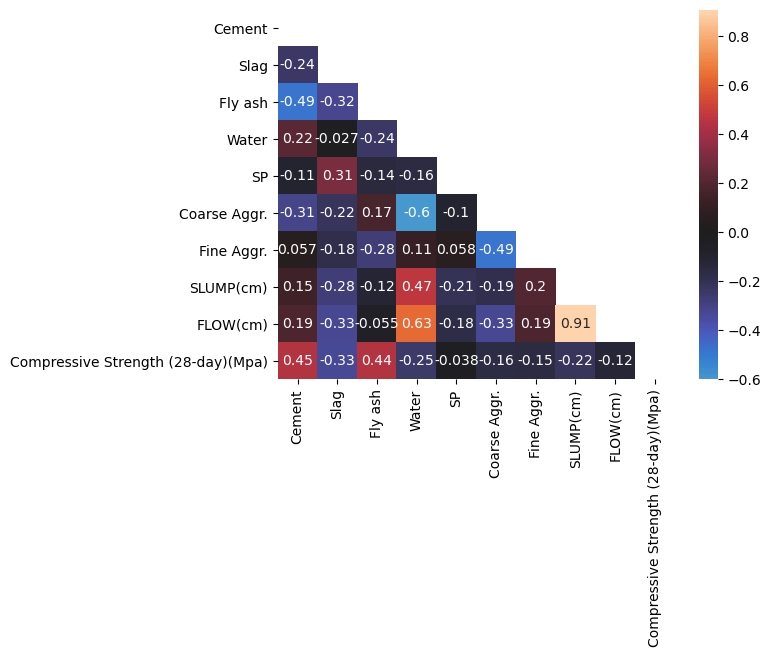

In [12]:
sns.heatmap(matrix, 
           center=0,
           annot =True,
           mask =mask);

## Split data

In [13]:
X = df.drop('Compressive Strength (28-day)(Mpa)', axis=1)
y = df['Compressive Strength (28-day)(Mpa)']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2, random_state=42)

## Scaling data

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Model SVM Regressior dan Hyperparameter Tuning GridSearchCV

In [20]:
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV

In [21]:
#help(SVR)

### Model SVR

In [22]:
svr = SVR()

In [23]:
param_grid = {'kernel' : ['liner','rbf', 'poly'],
             'gamma' : ['scale', 'auto'],
             'epsilon' : [0.001, 0.01, 0.1, 1.0, 10],
             'degree' : [2,3,4]}

In [24]:
grid = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)

In [25]:
grid.fit(X_train_scaler, y_train)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_l

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'degree': [2, 3, 4],
                         'epsilon': [0.001, 0.01, 0.1, 1.0, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['liner', 'rbf', 'poly']})

In [26]:
grid.best_estimator_

SVR(degree=2, epsilon=1.0, gamma='auto')

In [27]:
grid.best_estimator_.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 2,
 'epsilon': 1.0,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [28]:
grid.best_score_

0.31056926873063445

In [29]:
svr_preds = grid.predict(X_test_scaler)

## Evaluasi model SVR

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [31]:
MAE = mean_absolute_error(y_test, svr_preds)
MAE

4.253930833393067

In [32]:
MSE = mean_squared_error(y_test, svr_preds)
MSE

26.367947945644552

In [33]:
RMSE = np.sqrt(MSE)
RMSE

5.134973022874078

In [34]:
r2_score(y_test, svr_preds)

0.47886570077232826

### Model LinearSVR

In [35]:
#help(LinearSVR)

In [36]:
lin_svr = LinearSVR()

In [37]:
param_grid = {'epsilon' :[0.0],
             'C' : [0.0001, 0.001, 0.01, 0.1, 1.0, 10]}

In [38]:
grid = GridSearchCV(lin_svr,param_grid)

In [39]:
grid.fit(X_train_scaler, y_train)

C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\ibrahim\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVR(),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10],
                         'epsilon': [0.0]})

In [40]:
grid.best_estimator_

LinearSVR(C=10)

In [41]:
grid.best_estimator_.get_params()

{'C': 10,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [42]:
grid.best_score_

0.8048278941698234

In [43]:
lin_preds = grid.predict(X_test_scaler)

## Evaluasi model LinearSVR

In [44]:
MAE = mean_absolute_error(y_test, lin_preds)
MAE

1.8043383161330824

In [45]:
MSE = mean_squared_error(y_test, lin_preds)
MSE

4.452730432929376

In [46]:
RMSE = np.sqrt(MSE)
RMSE

2.1101493864012033

In [47]:
r2_score(y_test, lin_preds)

0.9119965437356807

**kesimpulan**

dari hasil perbandingan 2 model SVR dan LinearSVR nilai terbaik menggunkan model `LinearSVR`
karena hasil perhitunngan MAE, MSE, RMSE = mempunyai nilai yang mendekati angka 0 merupakan indikasi nilai terbaik